In [1]:
import warnings
warnings.filterwarnings('ignore')

% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

style='../mpl_styles/spykes.mplstyle'
plt.style.use(style)

In [2]:
from neuropop import NeuroPop

### Create a NeuroPop object

In [3]:
n_neurons = 10
pop = NeuroPop(n_neurons=n_neurons, tunemodel='glm')

### Simulate a population of neurons

In [4]:
# Simulate a population of neurons
n_samples = 500
x, Y, mu, k0, k, g, b = pop.simulate(pop.tunemodel, n_samples=500, winsize=400.0)

### Fit the tuning curves with gradient descent

In [5]:
pop.fit(x, Y)

### Predict the population activity with the fit tuning curves

In [6]:
Yhat = pop.predict(x)

### Score the prediction

In [7]:
Ynull = np.mean(Y, axis=0)
pseudo_R2 = pop.score(Y, Yhat, Ynull, method='pseudo_R2')
print pseudo_R2

[0.029297379040678417, 0.88419780050908048, 0.67891628456306286, 0.72705232181642832, 0.82338717340125367, 0.2003104316427623, 0.88319701756873603, 0.5723321160007333, 0.8644697617790158, 0.89593170451273085]


In [8]:
np.max(Y)

45.0

### Plot the simulated and fit tuning curves

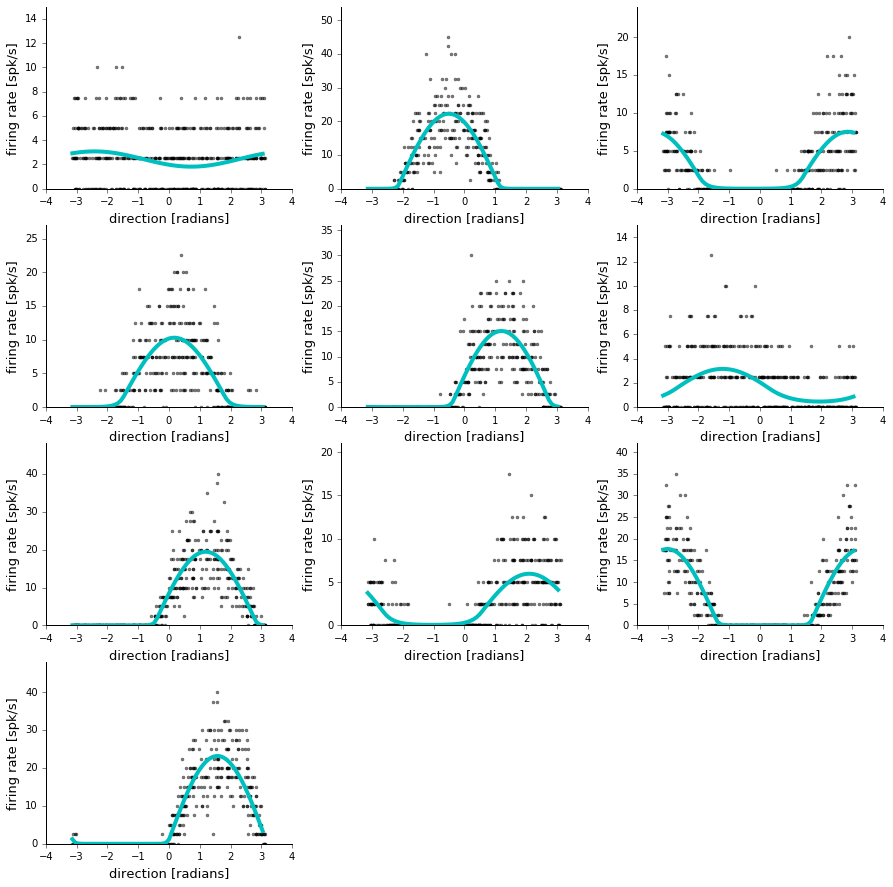

In [9]:
plt.figure(figsize=[15,15])

for neuron in range(pop.n_neurons):
    plt.subplot(4,3,neuron+1)
    pop.display(x, Y[:, neuron], neuron=neuron, 
                ylim=[0.8*np.min(Y[:, neuron]), 1.2*np.max(Y[:, neuron])])

plt.show()

### Decode feature from the population activity

In [10]:
xhat = pop.decode(Y)

### Visualize ground truth vs. decoded estimates

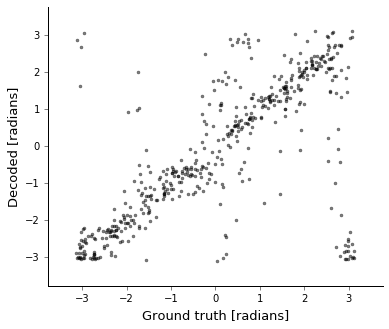

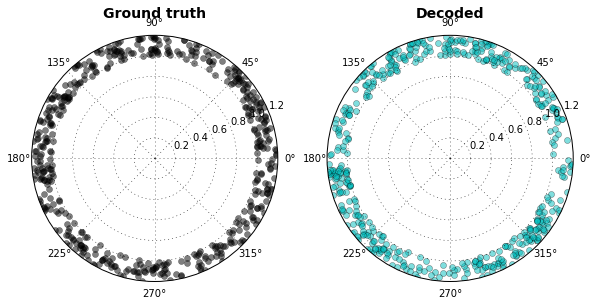

In [11]:
plt.figure(figsize=[6,5])

plt.plot(x, xhat, 'k.', alpha=0.5)
plt.xlim([-1.2*np.pi, 1.2*np.pi])
plt.ylim([-1.2*np.pi, 1.2*np.pi])
plt.xlabel('Ground truth [radians]')
plt.ylabel('Decoded [radians]')
plt.tick_params(axis='y', right='off')
plt.tick_params(axis='x', top='off')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.figure(figsize=[15,5])
jitter = 0.2*np.random.rand(x.shape[0])
plt.subplot(132, polar=True)
plt.plot(x, np.ones(x.shape[0]) + jitter, 'ko', alpha=0.5)
plt.title('Ground truth')

plt.subplot(133, polar=True)
plt.plot(xhat, np.ones(xhat.shape[0]) + jitter, 'co', alpha=0.5)
plt.title('Decoded')
plt.show()

### Score decoding performance

In [12]:
# Circular correlation
circ_corr = pop.score(x, xhat, method='circ_corr')
print circ_corr

0.498235970127


In [13]:
# Cosine distance
cosine_dist = pop.score(x, xhat, method='cosine_dist')
print cosine_dist

0.773042431939
